<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/cleaning_eda_feature_engineering_for_regression_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA, Visualization, Feature engineering Part 1

## Import libraries

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Import and cleaning data

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/Absenteeism-data.csv')
df0.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


Copy the dataset and remove id column

In [ ]:
df = df0.copy()

In [ ]:
df = df.drop(['ID'], axis=1)

Check for duplicates

In [ ]:
df.duplicated().sum()

8

In [ ]:
df[df.duplicated()]

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
127,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
305,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
388,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
389,27,24/02/2017,179,51,38,251.818,31,1,0,0,3
477,28,25/07/2017,246,25,41,230.290,23,1,0,0,2
496,28,05/09/2017,246,25,41,261.756,23,1,0,0,1


Let's remove duplicates

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason for Absence         692 non-null    int64  
 1   Date                       692 non-null    object 
 2   Transportation Expense     692 non-null    int64  
 3   Distance to Work           692 non-null    int64  
 4   Age                        692 non-null    int64  
 5   Daily Work Load Average    692 non-null    float64
 6   Body Mass Index            692 non-null    int64  
 7   Education                  692 non-null    int64  
 8   Children                   692 non-null    int64  
 9   Pets                       692 non-null    int64  
 10  Absenteeism Time in Hours  692 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 59.6+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') #format helps to read Dates

Display all columns / rows

In [ ]:
#pd.options.display.max_columns = None #none means NO LIMIT, so you can see everything
#pd.options.display.max_rows = None
#display(df)

## EDA

In [ ]:
df.describe(datetime_is_numeric=True)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,692.000000,692,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,19.326590,2016-12-31 20:38:09.017340928,222.838150,29.946532,36.387283,271.784341,26.713873,1.286127,1.031792,0.695087,6.815029
min,0.000000,2015-07-06 00:00:00,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,2016-03-28 00:00:00,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,2016-12-19 00:00:00,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,26.000000,2017-10-27 12:00:00,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,2018-05-31 00:00:00,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000
std,8.365406,NaN,66.283606,14.781330,6.405520,40.131653,4.245939,0.671248,1.113852,1.170466,12.733170


Scatter plot matrix

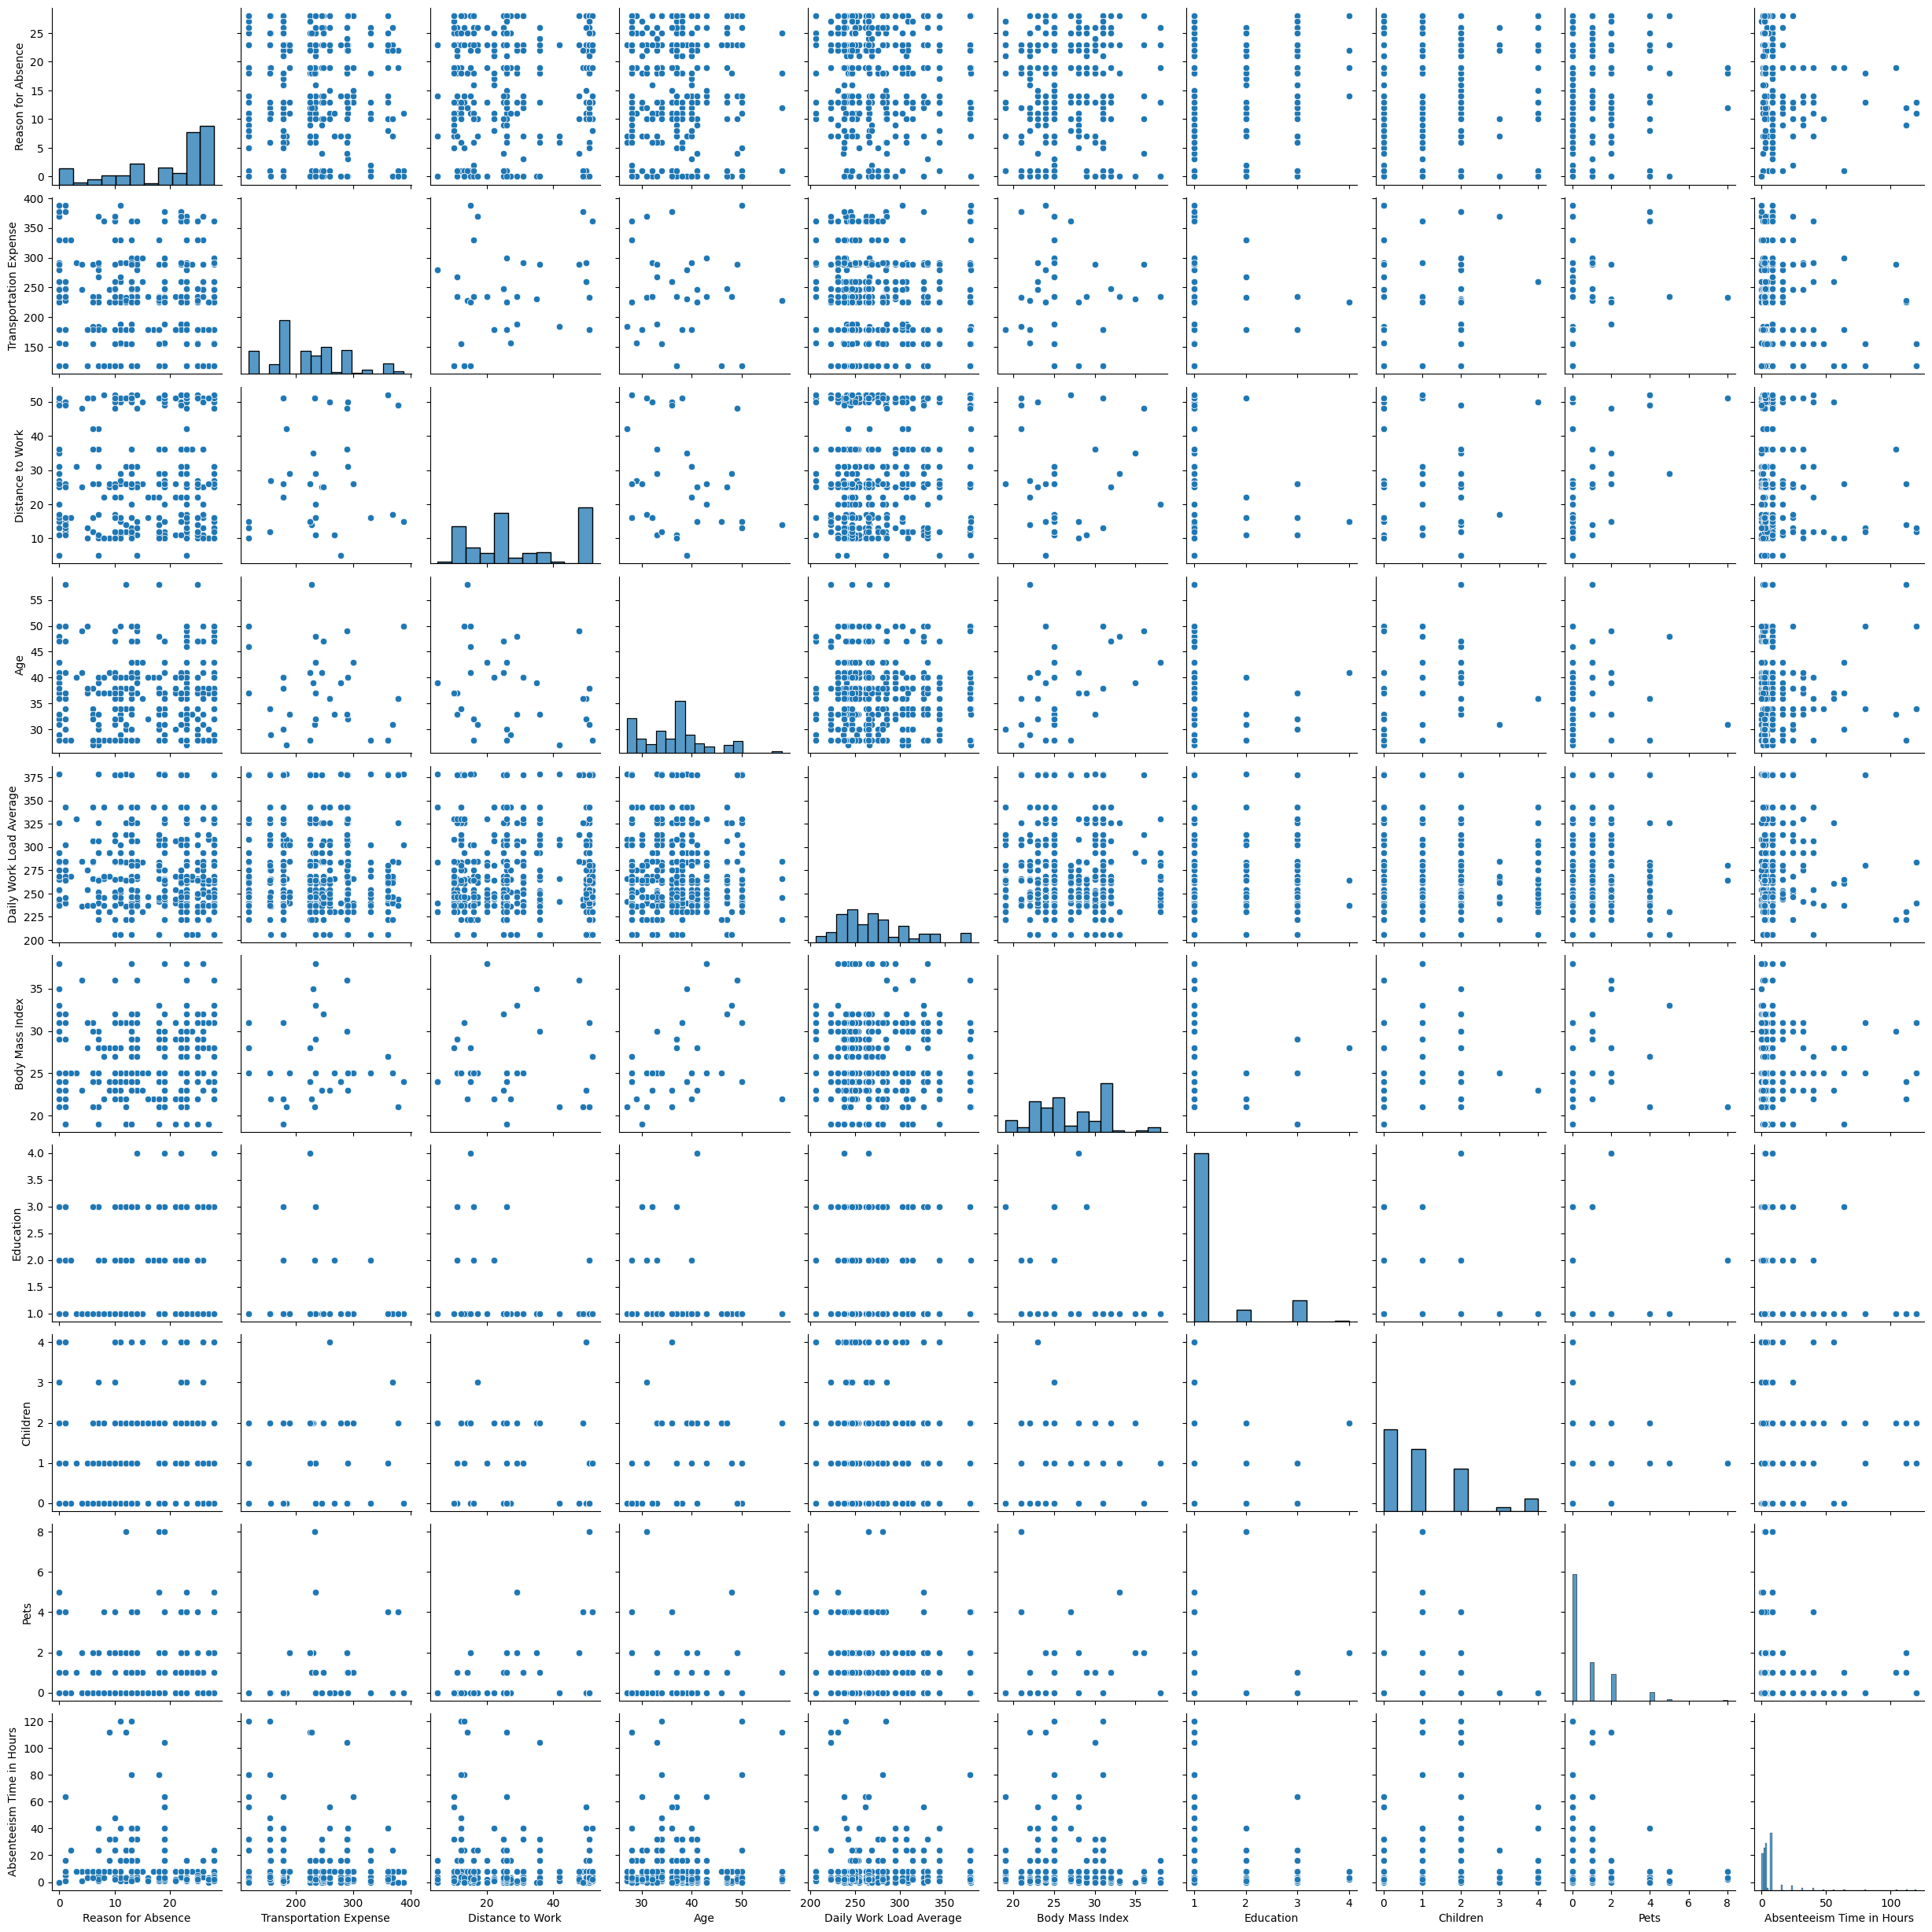

In [ ]:
sns.pairplot(df)
plt.show()

Correlation

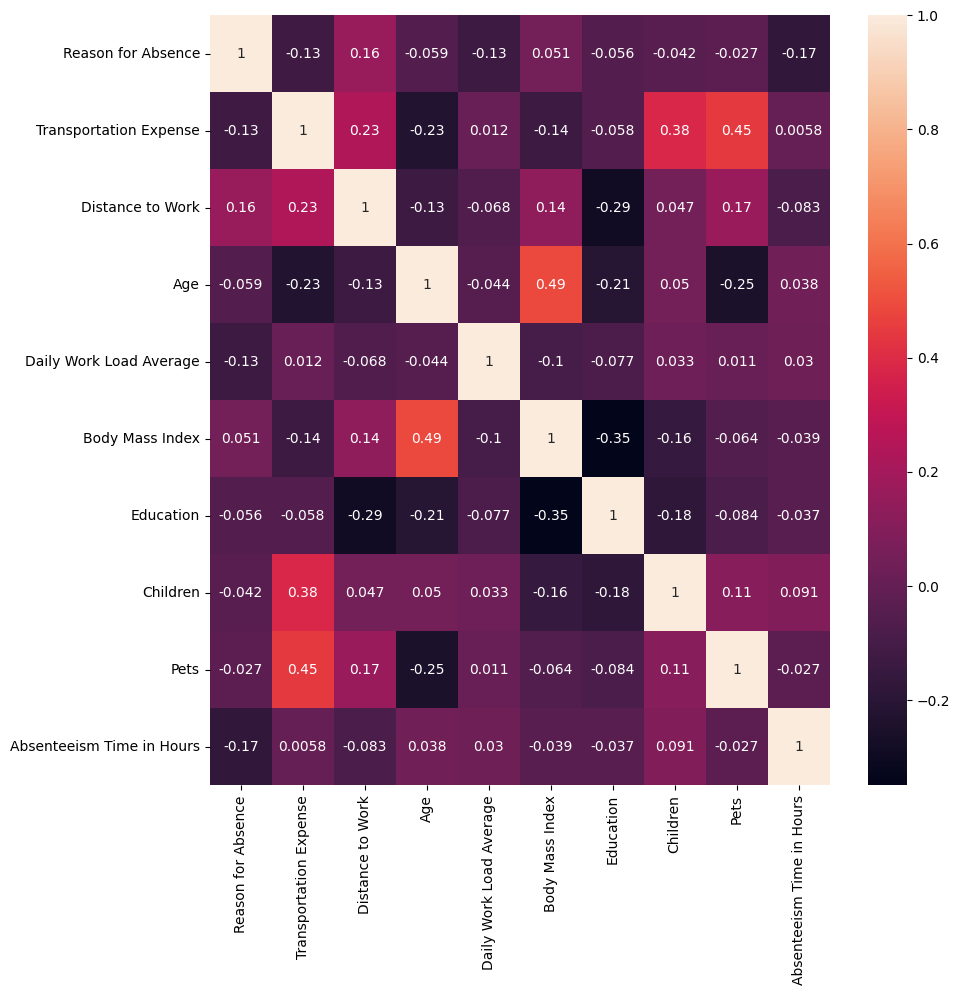

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True),  annot=True)
plt.show()

Transporation expenses and Number of Pets have low positive correlation. Also, BMI and age have low positive correlation. There is no strong correlation.

Let's check for outliers

In [ ]:
df_numeric_columns = ['Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average',
                      'Body Mass Index', 'Children', 'Pets', 'Absenteeism Time in Hours']

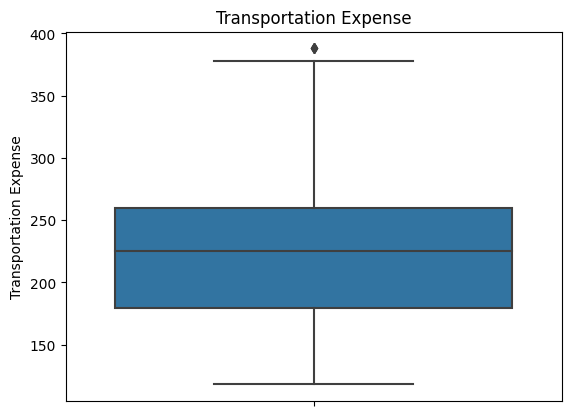

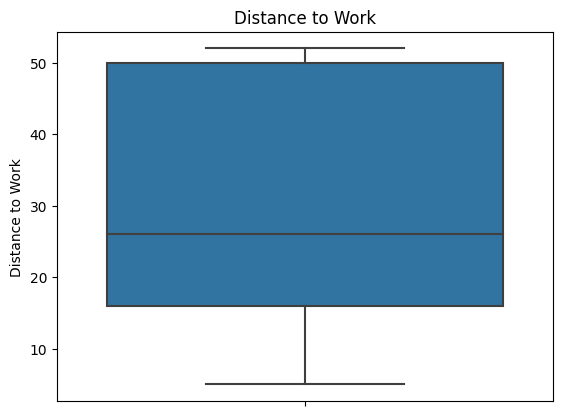

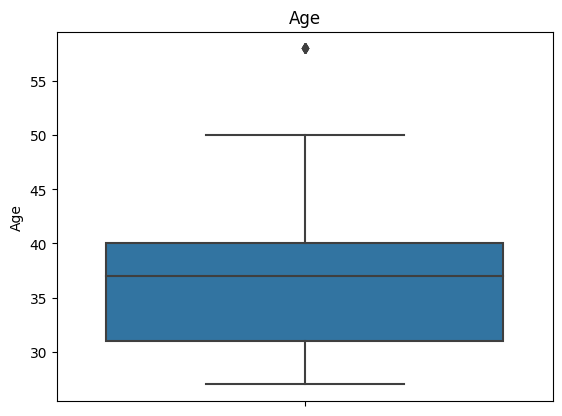

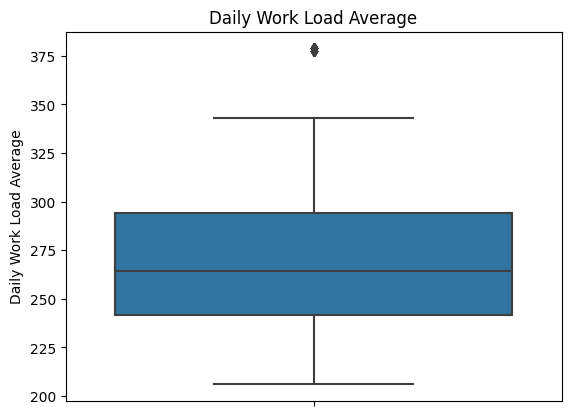

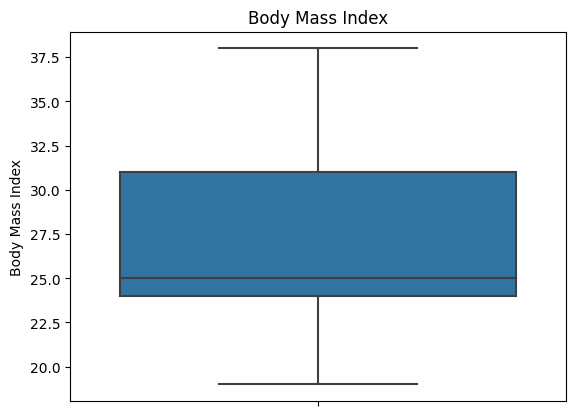

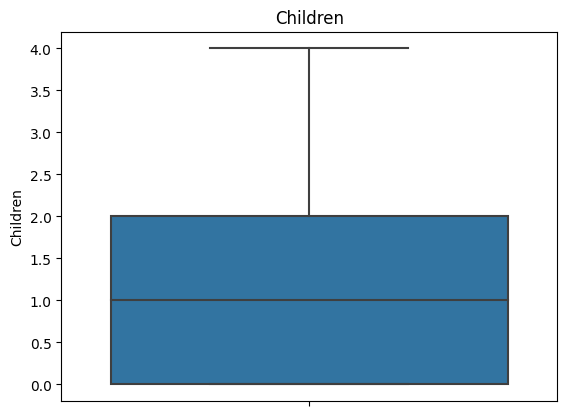

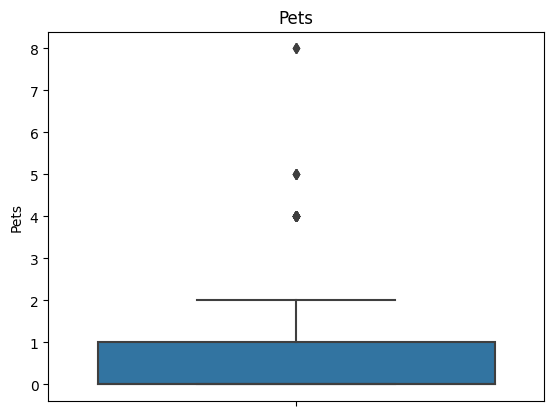

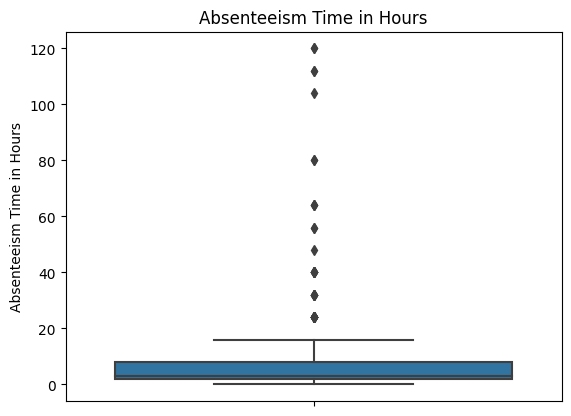

In [ ]:
for name in df_numeric_columns:
    plt.title(name)
    sns.boxplot(y=name, data=df)
    plt.show()

Remove outliers in numerical data (the values which are outside 1.5IQR)

In [ ]:
for name in df_numeric_columns:
    Q1,Q3 = df[name].quantile(0.25),df[name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit, upper_limit = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df = df[(df[name] > lower_limit) & (df[name] < upper_limit)].reset_index(drop=True)

Check the distributions again

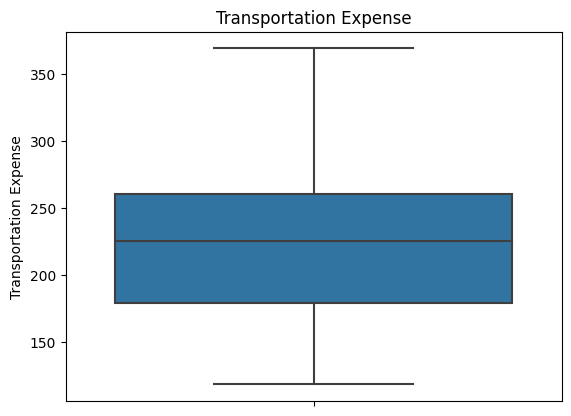

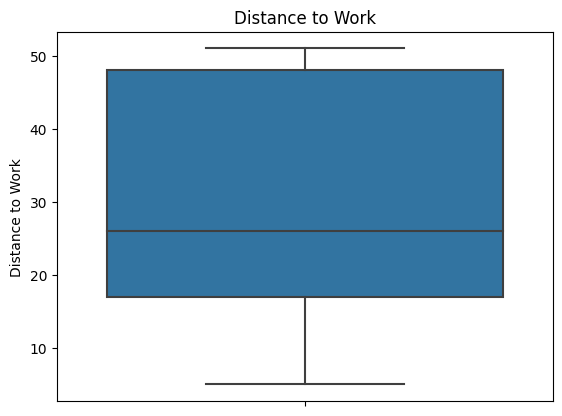

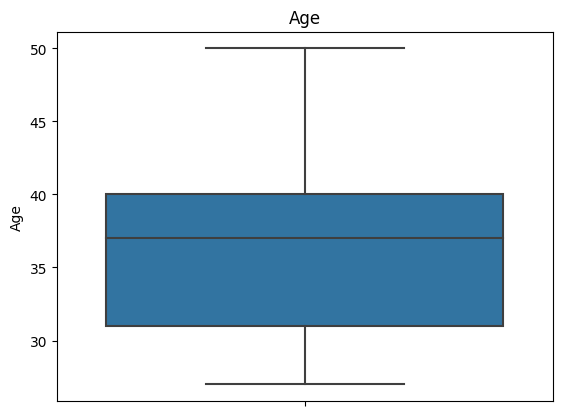

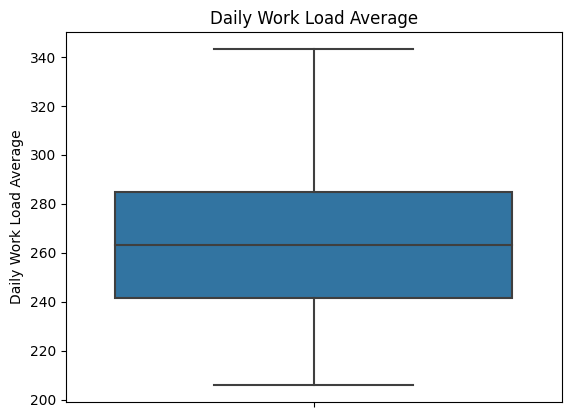

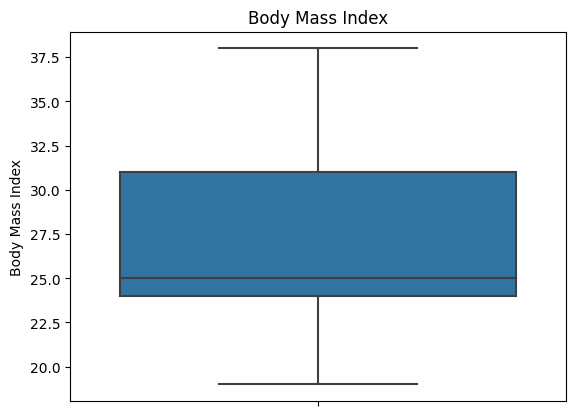

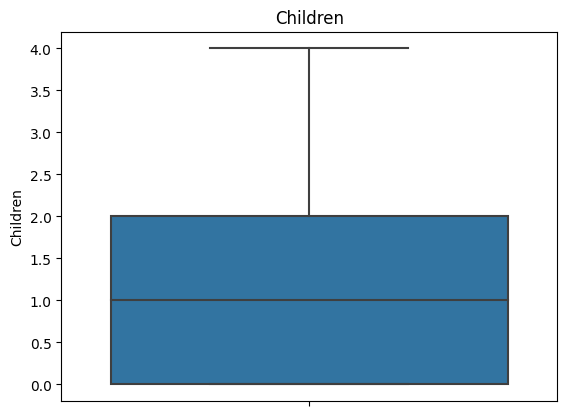

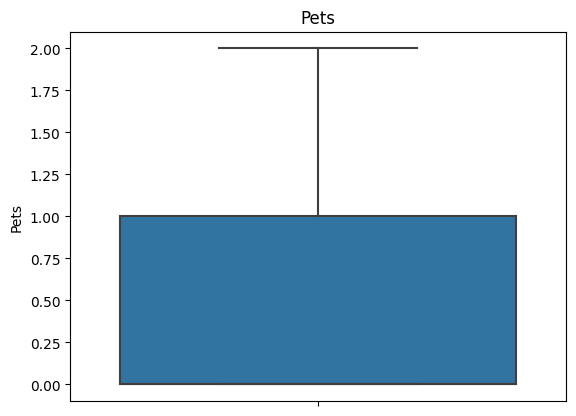

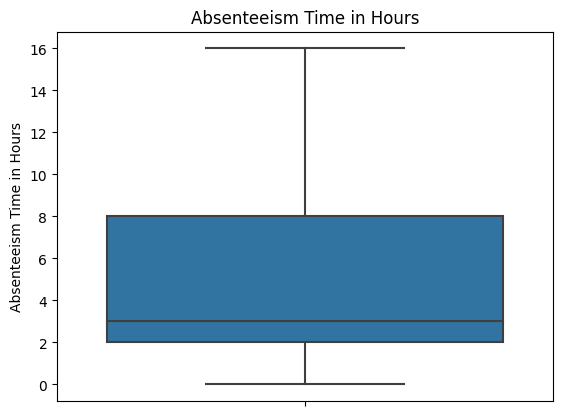

In [ ]:
for name in df_numeric_columns:
    plt.title(name)
    sns.boxplot(y=name, data=df)
    plt.show()

## Feature engineering

### Categorical: Reason for Absence (get_dummies and group them)

In [ ]:
df['Reason for Absence'].describe()

count    584.000000
mean      20.073630
std        8.276715
min        0.000000
25%       14.000000
50%       23.000000
75%       27.000000
max       28.000000
Name: Reason for Absence, dtype: float64

In [ ]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [ ]:
#pd.unique(df['Reason for Absence'])

In [ ]:
#df['Reason for Absence'].unique()

In [ ]:
reason_columns = pd.get_dummies(df['Reason for Absence']) #converts categorical columns into dummy variables

In [ ]:
# dummy variables: an explanatory binary variable that equals to 1 if a certain categorical effect is present
# and that equals to 0 if the same effect is absent
reason_columns

,0,1,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# check that is there a 1 for each column!
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

,0,1,3,4,5,6,7,8,9,10,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
580,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
581,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
reason_columns['check'].sum(axis=0)

584

In [ ]:
reason_columns['check'].unique()

array([1])

In [ ]:
# you can drop this column because we only wanted to check the get dummies
reason_columns = reason_columns.drop(['check'], axis = 1)
reason_columns

,0,1,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True) # remove one redundant column

In [ ]:
reason_columns

,1,3,4,5,6,7,8,9,10,11,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [ ]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [ ]:
reason_columns.columns.values

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
# we dont wanna have duplicate values this will caluse multicolinearity ( you dont want that)
df = df.drop(['Reason for Absence'], axis = 1) #its time to drop this column and we will replace the new one

Group into 4 categories

In [ ]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1) # its better to have it less groups as 4 here
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1) # otherwise you will have around 40 columns, not good
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)
# how to group, you must regroup by relation
# those 4 oness as diseases, pregnancy, work-related, consultations
# so you have 4 groups now
# retrieve all rows and retrieve between 1 to 14 columns and make it GROUP 1 as reasonType1

Add 4 groups to dataframe

In [ ]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


Name columns and reoder them

In [ ]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_diseases', 'Reason_pregnancy', 'Reason_workRelated', 'Reason_consultations']

In [ ]:
df.columns = column_names

In [ ]:
column_names_reordered = ['Reason_diseases', 'Reason_pregnancy', 'Reason_workRelated', 'Reason_consultations',
                          'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [ ]:
df = df[column_names_reordered]

#### Checkpoint

In [ ]:
df_reason_mod = df.copy()

### Date (extract months (via list of months) and days of week (via apply func))

In [ ]:
df_reason_mod.shape

(584, 14)

In [ ]:
list_months = []

In [ ]:
for i in range(df_reason_mod.shape[0]):
  list_months.append(df_reason_mod['Date'][i].month)

In [ ]:
len(list_months)

584

In [ ]:
df_reason_mod['Month Value'] = list_months

In [ ]:
def date_to_weekday(date_value): # a way to modify date and extract days
    return date_value.weekday() # just return me weekdays from date values

In [ ]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [ ]:
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)
df_reason_mod.head()

,Reason_diseases,Reason_pregnancy,Reason_workRelated,Reason_consultations,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


In [ ]:
df_reason_mod.columns.values

array(['Reason_diseases', 'Reason_pregnancy', 'Reason_workRelated',
       'Reason_consultations', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Month Value', 'Day of the Week'],
      dtype=object)

In [ ]:
column_names_upd = ['Reason_diseases', 'Reason_pregnancy', 'Reason_workRelated', 'Reason_consultations', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [ ]:
df_reason_mod = df_reason_mod[column_names_upd]
df_reason_mod.head()

,Reason_diseases,Reason_pregnancy,Reason_workRelated,Reason_consultations,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


#### Checkpoint

In [ ]:
df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod.head()

,Reason_diseases,Reason_pregnancy,Reason_workRelated,Reason_consultations,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


### Categorical: Education (map into few categories)

In [ ]:
df_reason_date_mod['Education'].value_counts()

1    476
3     70
2     34
4      4
Name: Education, dtype: int64

In [ ]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1}) #just map evertyhing into 0 and 1, highschool as 0, rest is 1

In [ ]:
df_reason_date_mod['Education'].unique()

array([0, 1])

In [ ]:
df_reason_date_mod['Education'].value_counts()

0    476
1    108
Name: Education, dtype: int64

#### Checkpoint and export to csv

In [ ]:
df_cleaned = df_reason_date_mod.copy()
df_cleaned.head()

,Reason_diseases,Reason_pregnancy,Reason_workRelated,Reason_consultations,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/AbsenteeismCleaned.csv',index=False)